https://github.com/DataTalksClub/data-engineering-zoomcamp/blob/main/cohorts/2023/week_2_workflow_orchestration/homework.md

The goal of this homework is to familiarise users with workflow orchestration and observation.

# Question 1. Load January 2020 data

Using the **etl_web_to_gcs.py** flow that loads taxi data into GCS as a guide, create a flow that loads the green taxi CSV dataset for January 2020 into GCS and run it. Look at the logs to find out how many rows the dataset has.

prefect orion start
prefect agent start -q 'default'

In [17]:
!prefect deployment build etl_web_to_gcs.py:etl_parent_flow \
    -n "Load data to GCS" \
    --params '{"months": [1], "year": 2020, "color": "green"}' \
    -a

Found flow 'etl-parent-flow'
Deployment YAML created at 
'/mnt/w/ml/DataEngineering/homeworks/week_2_prefect/etl_parent_flow-deployment.y
aml'.
Deployment storage None does not have upload capabilities; no files uploaded.  
Pass --skip-upload to suppress this warning.
Deployment 'etl-parent-flow/Load data to GCS' successfully created with id 
'b2c8853e-1506-4f2d-ab0a-68d7db5987a4'.

To execute flow runs from this deployment, start an agent that pulls work from 
the 'default' work queue:
$ prefect agent start -q 'default'


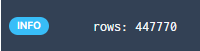

Answer: __447770__

# Question 2. Scheduling with Cron

Cron is a common scheduling specification for workflows.

Using the flow in etl_web_to_gcs.py, create a deployment to run on the first of every month at 5am UTC. What’s the cron schedule for that?

Answer: __0 5 1 * *__

# Question 3. Loading data to BigQuery

Using etl_gcs_to_bq.py as a starting point, modify the script for extracting data from GCS and loading it into BigQuery. This new script should not fill or remove rows with missing values. (The script is really just doing the E and L parts of ETL).

The main flow should print the total number of rows processed by the script. Set the flow decorator to log the print statement.

Parametrize the entrypoint flow to accept a list of months, a year, and a taxi color.

Make any other necessary changes to the code for it to function as required.

Create a deployment for this flow to run in a local subprocess with local flow code storage (the defaults).

Make sure you have the parquet data files for Yellow taxi data for Feb. 2019 and March 2019 loaded in GCS. Run your deployment to append this data to your BiqQuery table. How many rows did your flow code process?

pip install pandas-gbq

prefect deployment build etl_gcs_to_bq.py:etl_gcs_to_bq \
&emsp;-n "Load data into BigQuery" \
&emsp;--params '{"color": "yellow", "year": 2019, "months": [2,3]}' \
&emsp;-a

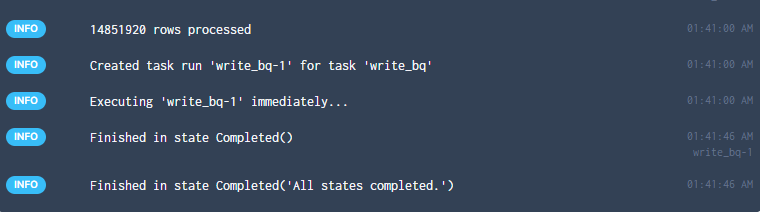

Answer: __14,851,920__

# Question 4. Github Storage Block

Using the web_to_gcs script from the videos as a guide, you want to store your flow code in a GitHub repository for collaboration with your team. Prefect can look in the GitHub repo to find your flow code and read it. Create a GitHub storage block from the UI or in Python code and use that in your Deployment instead of storing your flow code locally or baking your flow code into a Docker image.

Note that you will have to push your code to GitHub, Prefect will not push it for you.

Run your deployment in a local subprocess (the default if you don’t specify an infrastructure). Use the Green taxi data for the month of November 2020.

How many rows were processed by the script?

prefect deployment build --name "GitHub Block" \
&emsp;-sb github/prefect-git \
&emsp;web_to_gcs.py:etl_parent_flow \
&emsp;--params '{"months": [11], "year": 2020, "color": "green"}' \
&emsp;--apply

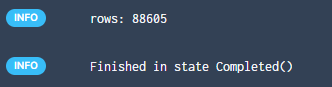

Answer: __88605__

# Question 5. Email or Slack notifications

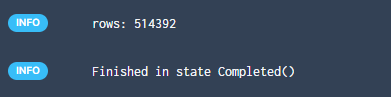

Answer: __514392__

# Question 6. Secrets

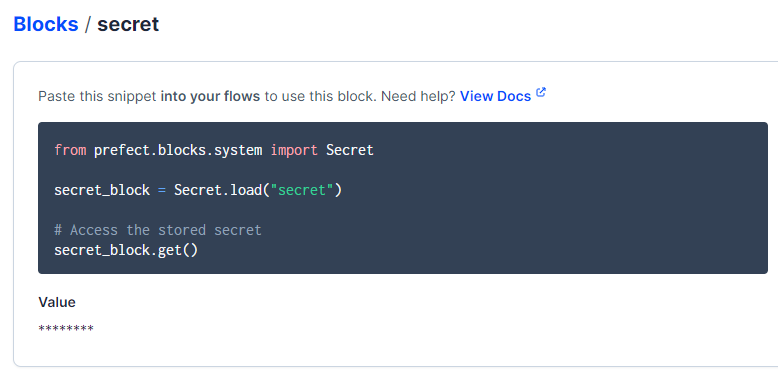

Answer: __8__